<a href="https://colab.research.google.com/github/mbohling/spiking-neuron-model/blob/main/SNM_Integrate_and_Fire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Welcome to Simulating Spiking Model Neurons
In the following notebook, you will see the integrate-and-fire neuron implemented in Python.  Read through each section in order and run the blocks of code as you reach them.

## Integrate-and-Fire Python Walk-Through
The goal of this section is to walk through a simple implementation of the integrate-and-fire model neuron.

Recall that the basic equation is expressed as follows:

$ \displaystyle \tau_{m}\frac{dV}{dt} = E_{L} - V(t) + R_{m}I_{e} $




### Voltage Parameters

We will start by defining the Voltage-Parameters that determine the resting, threshold, spike, and reset values:

*   $ V_{rest} = -70 mV $
*   $ V_{th} = -54 mV $
*   $ V_{reset} = -80 mV $
*   $ V_{spike} = 0 mV $




In [14]:
# Voltage Paramaters - Units mV (1 mV = 1e-3 Volts)
Vrest = -70
Vth = -54
Vreset = -80
Vspike = 0

### Neuron Properties
We now need to define the values for the Membrane Resistance $ R_{m} $, the Membrane Capacitance, $ C_{m} $, and calculate the Membrane Time Constant.  Use the following values:
*    $ R_{m} = 10M\Omega $
*    $ C_{m} = 1 $ [Missing Units]
*    $ \tau_{m} = R_{m}C_{m} $


In [15]:
# Total Membrane Resistance - Units M_Ohm (1 M_Ohm = 1e6 Ohms)
Rm = 10

# Total Membrane Capacitance - Units 
Cm = 1

# Membrane Time Constant - Units ms (1 ms = 1e-3 Seconds)
tau_m = Rm*Cm

### Simulation Setup
We want to run a simulation of the integrate-and-fire model neuron in order to observe the membrane potential $V$ overtime.  We begin with the neuron at resting conditions: $V = V_{rest} = -70mV$.

Recall that the reversal potential $E_{L} = V_{rest}$.  Since we have defined $V_{rest}$ above, we can set the following parameters:

In [16]:
# Initial V
V = Vrest
EL = Vrest

We will be running a 500 ms simulation.  The following lines of code setup a time span for the simulation.  This is simply a matter of defining the start time $t_{0} = 0$ and the total length (in ms) of the simulation: $t_{final} = 500$.  

Throughout the simulation, we calculate the membrane potential $V$ at each *time-step*.  The time-step is the change in time for each iteration of the simulation, for example if $t_{0} = 0$, the next computation of $V$ is performed at $t_{0} + dt$.  

Thus, by setting $dt = 1$ (in ms), the simulation will compute $V$ at time $t = 1, 2, \ldots, t_{final}$.  For $dt = 1$, we compute $V$ at every 1 ms until the end of the simulation is reached.

We can therefore set up the simulation time-span as follows:

In [17]:
# Simulation Time Span (0 to 500ms, dt = 1ms)
t0 = 0
dt = 1
t_final = 500

# Create the list of time step values
time = range(t0, t_final, dt)

#### Python: Importing Libraries


Before moving further, we introduce a feature of Python necessary for many applications: *importing libraries*, sometimes called *packages* or *modules*.

Consider a scenario where you have a small dataset of numerical values:


In [18]:
# Data set as a list of numerical values
data = [99, 50, 34, 94.3, 65]

Let us say your objective use Python to find the maximum value and the average value of your data set.  It should be clear by simple inspection that the maximum value of the data set is 99.  However, what if your data set has 10,000 numerical values instead of 5.  It wouldn't be practical to inspect 10,000 numbers, so we need an **algorithm** to find this value for us.

The following code is a simple algorithm for finding the maximum value of a given data set of numerical values:


In [19]:
# Finding the maximum value

# We use this variable to keep track of the largest value we come across
max_value = 0

# A for-loop: for each number in our data set data
for num in data:
  # If this number is larger than the current max_value
  if num > max_value:
    # Then set max_value to this value
    max_value = num

# Print the result of our algorithm to find the maximum value.
print('Maximum Value: %i' % max_value)

Maximum Value: 99


By running the previous code, it should have found the maximum value and the output from the print function is:

`Maximum Value: 99`

Now you are tasked with finding the average value in the data set.  We find this by adding the values of the data set and dividing by the number of values.

The following code is another simple algorithm for computing the average value of a given data set of numerical values:

In [20]:
# Finding the average value

# Keep track of the total sum of the data set.
sum_of_data = 0

# Let N be the total number of data values
N = 0

# A for-loop: for each number in our data set data
for num in data:
  # Update our variable: sum_of_data by adding each value
  # Note that we do not want to overwrite the value of sum_of_data, but rather 
  # add to the current value
  sum_of_data = sum_of_data + num

  # Update our variable: N by adding 1 for each number we encounter
  N = N + 1

# Finally, compute the average value
average = sum_of_data/N;

# Print the result of our algorithm to find the average value to 2 decimals.
print('Average Value: %.2f' % average)

Average Value: 68.46


By running the previous code, it should have found the average value and the output from the print function is:

`Average Value: 68.46`

Do not worry about understanding every line of the code in either of the previous code blocks.  

You may be asking: how does this relate to the concept of **importing libraries**?  Think about the previous algorithms and what they do.  There are innumerable applications in which finding the maximum or average values are necessary.

Do we really need to write these algorithms every single time we need to find the average or maximum values of a data set?

Fortunately, the answer is no!  This is where the idea of a importing a *library* or *package* comes in.  A library is a code base that comes with pre-packaged algorithms ready for you to use.  In other words, another Python programmer has already written the code above, and they are nice enough to allow anyone to use their code.

Let us see how this works by finding the maximum and average values of our data set using a library called **numpy**:


In [21]:
# Finding the maximum and average values of our small data set

# We import the numpy library, and name the import 'np' 
# np is conventional, however you can call it anything you like
# i.e 'import numpy as abcdefg'
import numpy as np

# First, we find the maximum value and print the result:
max_value = np.max(data)
print('Maximum Value: %i' % max_value)

# Next, we find the average value and print the result:
average = np.mean(data)
print('Average Value: %.2f' % average)

Maximum Value: 99
Average Value: 68.46


Much easier right?  Note that we compute and output the results using the **numpy** library which already has the algorithms *max* and *mean* to do the job of our previous code in a single line!

These are just some basic examples, there are over 200,000 of these libraries providing access to algorithms helping us to avoid writing unnecessary code.

Visit https://pypi.org/ and look around for libraries and packages ready to be imported into your code!

### Injected Current

To summarize what we have so far: the integrate-and-fire neuron model describes the membrane potential $V$ by the basic differential equation:

$ \displaystyle \tau_{m}\frac{dV}{dt} = E_{L} - V(t) + R_{m}I_{e} $

We must define one last parameter, and that is the injected current $I_{e}$.  There are two aspects of this parameter that must be defined: the strength of the current measured in nanoamperes (nA), and the time values at which the current is switched on and off.

First, we set the strength of the injected current as:

In [22]:
# Input Current: Ie - Units nA (1 nA = 10-9 Amperes)
# Using 1.75 for default
Ie = 1.75

Recall that we have set up the simulation to run for 500ms.  We want to begin applying the injected current $I_{e}$ at 100ms, and switch it off at 400 ms.

To do this we define the variables:
*    $ t_{pulse} = 300\ ms $ 
*    $ start_{current} = \displaystyle \frac{\left|t_{final}-t_{pulse}\right|}{2} = \frac{\left|500-300\right|}{2} = 100\ ms$ 
*    $ end_{current} = start_{current} + t_{pulse} = 100 + 300 = 400\ ms $


  We can use the **numpy** library to help with this:

In [23]:
# Current Pulse Time Span - Units ms (1 ms = 1e-3 Seconds)
t_pulse = 300 

# Time at which the current is applied
start_current = np.absolute(t_final-t_pulse)/2 

# Time at which the current is switched off
end_current = start_current+t_pulse 

### Computing and Storing $\frac{dV}{dt}$

We are about ready to finish the code implementation for simulating an integrate-and-fire model neuron.

We only need some way to store the values of the membrane potential $V$ at each time step.  To do this, we simply create an empty list $V(t)$ with a length equal to the number of time-steps of our simulation.  We then set $V(t_{0}) = V(0) = V_{rest}$ as we begin our simulation at resting conditions.

In [24]:
# Create a list V(t) to store the value of V at each time-step dt
Vt = [0] * len(time)

# Set the initial value at time t = t0 to the resting potential
Vt[0] = Vrest

Finally, we run our simulation according to the following *psuedo-code*


*for each time-step from $t = t_{0}$ to $t = t_{final}$*
> *If the current time $t < start_{current}\ $ or $\ t > end_{current}$*
>> $I_{e} = 0$

> *otherwise*
>> $I_{e} = 1.75\ nA$

> *Use Euler's Method of Numerical Integration to determine the change in membrane potential $\ dV$ as: $\ \displaystyle dV = \frac{dt}{\tau_{m}}(E_{L} - V(t) + R_{m}I_{e})$*

> *Use this value to update $V(t+1) = V(t) + dV$*

> *If $\ V(t+1) \geq V_{th} $* 
>> $V(t) = V_{spike}$

>> $V(t+1) = V_{reset}$

This translates to the following Python code:

In [25]:
for t in time[0:-2]:

    if t < start_current or t > end_current:
        ie = 0
    else:
        ie = Ie

    dVt = (1/tau_m)*(EL - Vt[t] + Rm*ie)*dt

    Vt[t+1] = Vt[t] + dVt

    if Vt[t+1] >= Vth:
        Vt[t] = Vspike
        Vt[t+1] = Vreset

### Visualizing Results

Now we have values of $V$ for each time-step of the simulation, we can visualize the results by using Python to plot the data.  This makes use of another widely used library **matplotlib**.

We can plot the results as:

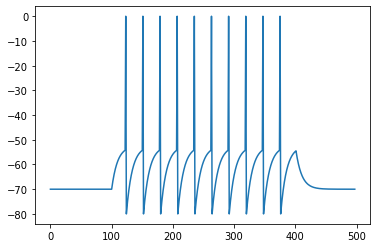

In [26]:
import matplotlib.pyplot as plt

# Plot the membrane potential
plt.plot(time[0:-2], Vt[0:-2])

# Display the plot
plt.show()                           

# Full Integrate-and-Fire Model Neuron Code

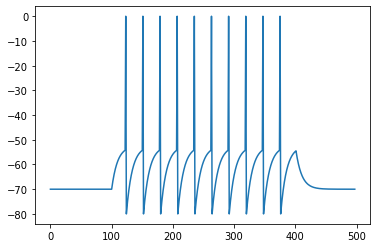

In [28]:
# Integrate-and-Fire Model Neuron

import matplotlib.pyplot as plt
import numpy as np

# Voltage Paramaters - Units mV (1 mV = 1e-3 Volts)
Vrest = -70
Vth = -54
Vreset = -80
Vspike = 0

# Total Membrane Resistance - Units M_Ohm (1 M_Ohm = 1e6 Ohms)
Rm = 10

# Total Membrane Capacitance - Units 
Cm = 1

# Membrane Time Constant - Units ms (1 ms = 1e-3 Seconds)
tau_m = Rm*Cm

# Initial V
V = Vrest
EL = Vrest

# Simulation Time Span (0 to 500ms, dt = 1ms)
t0 = 0
dt = 1
t_final = 500

# Create the list of time step values
time = range(t0, t_final, dt)

# Current Pulse Time Span - Units ms (1 ms = 1e-3 Seconds)
t_pulse = 300 

# Time at which the current is applied
start_current = np.absolute(t_final-t_pulse)/2 

# Time at which the current is switched off
end_current = start_current+t_pulse 

# Input Current: Ie - Units nA (1 nA = 10-9 Amperes)
# Using 1.75 for default
Ie = 1.75

# Create a list V(t) to store the value of V at each time-step dt
Vt = [0] * len(time)

# Set the initial value at time t = t0 to the resting potential
Vt[0] = Vrest

for t in time[0:-2]:

    if t < start_current or t > end_current:
        ie = 0
    else:
        ie = Ie

    # General Passive Integrate-and-Fire Model
    dVt = (1/tau_m)*(EL - Vt[t] + Rm*ie)*dt

    Vt[t+1] = Vt[t] + dVt

    # If V crosses our threshold value Vth
    # 1. Store the Vspike value at time t
    # 2. Set V back to Vreset
    if Vt[t+1] >= Vth:
        Vt[t] = Vspike   # 1
        Vt[t+1] = Vreset # 2

# Plot the membrane potential
plt.plot(time[0:-2], Vt[0:-2])

# Display the plot
plt.show()    
